link tableau

https://public.tableau.com/app/profile/m.irfizzanov/viz/Book1_17376424465130/Dashboard1?publish=yes


Objektif Point 

Data IMDb menunjukkan bahwa film horor berkualitas tinggi tidak selalu bergantung pada elemen agama atau cerita viral yang kebenarannya dipertanyakan.  Banyak film horor sukses yang  mengutamakan aspek sinematik seperti  penyutradaraan,  penulisan naskah,  akting, dan sinematografi  untuk menciptakan  atmosfer  yang  efektif.

film horor yang berkualitas tidak  bergantung  pada  formula  yang  klise.  Inovasi  dan  originalitas  dalam  bercerita  adalah  kunci  untuk  menghasilkan  film  horor  yang  menarik  dan  berkesan.

Semoga analisis dan rekomendasi ini bermanfaat bagi para "sinefil" dan  penikmat  film  horor.




Identifikasi masalah
Specific: mencari tahu  film horor paling populer berdasarkan rating, jumlah vote, dan tahun rilis di IMDb.

Measurable: mengukur popularitas diukur pakai metrik seperti rata-rata rating, jumlah vote, dan perubahan tren tahunan.

Achievable: melakukan analisis tren menggunakan metode statistik

Relevant: Analisa ini menggunakan data dari IMDB (kasih tau hasil analisanya buat apa)

Time-bound: Selesai dalam waktu 2 minggu.

Problem Statement:
Menentukan film horor yang paling populer berdasarkan rata-rata rating, jumlah suara, dan tren tahunan dari data IMDb untuk memberikan wawasan yang relevan bagi penonton dalam waktu dua minggu.


5w 1 h

What: apa film horor yang paling  sukses berdasarkan metrik rating IMDb, gross, dan votes? 
apa faktor utama yang bikin film horror  mendapat rating tinggi/rendah ?

Why: mengapa film horror (pilih judul) mendapatkan rating dan pendapatan yang tinggi dibandingkan film lain ?



When: kapan tren film horror terbaik mulai muncul ? 

Who: siapa direktor yang paling populer berdasarkan vote ?

How: berapa rata2  rating yang diberiikan oleh penonton ?

     bagaimana hubungan antara jumlah votes dan gross dari film horor ? 

In [3]:
#import yang dipakai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import spearmanr



In [4]:
#data loading

df = pd.read_csv('Horror Movies IMDb.csv')

In [5]:
# cek data 
print(df.head())
print(df.info())

   Movie Title  Movie Year  Runtime                      Genre  Rating  \
0        Alien        1979      117             Horror, Sci-Fi     8.5   
1       Psycho        1960      109  Horror, Mystery, Thriller     8.5   
2  The Shining        1980      146              Drama, Horror     8.4   
3    The Thing        1982      109    Horror, Mystery, Sci-Fi     8.2   
4      Tumbbad        2018      104     Drama, Fantasy, Horror     8.2   

           Director      Votes    Gross  
0      Ridley Scott   9,05,275  $78.90M  
1  Alfred Hitchcock   6,89,068  $32.00M  
2   Stanley Kubrick  10,51,582  $44.02M  
3    John Carpenter   4,39,793  $13.78M  
4   Rahi Anil Barve     53,297      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null 

berdasarkan hasil di atas, ada selisih jumlah data pada tabel gross, oleh karena itu saya mengisi Gross dengan median 

In [6]:
# data cleaning

# hapus $ dan M di tabel Gross dan ubah Dtype ke float
df['Gross'] = df['Gross'].replace({'\$': '', 'M': ''}, regex=True).astype(float)

# lepas koma dari Vote dan ubah Dtype ke int
df['Votes'] = df['Votes'].replace({',': ''}, regex=True).astype(int)

# ubah Dtype Runtime jadi int
df['Runtime'] = df['Runtime'].astype(int)

# ubah Dtype Rating ke float
df['Rating'] = df['Rating'].astype(float)

# Ubah Dtype Year ke integer
df['Movie Year'] = df['Movie Year'].astype(int)

# Isi nilai kosong pada kolom Gross dengan median
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Fezza Ganteng\AppData\Local\Temp\ipykernel_13648\1800088524.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Gross'] = df['Gross'].replace({'\$': '', 'M': ''}, regex=True).astype(float)


In [7]:
# cek data yang sudah bersih 
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null    int64  
 3   Genre        836 non-null    object 
 4   Rating       836 non-null    float64
 5   Director     836 non-null    object 
 6   Votes        836 non-null    int64  
 7   Gross        836 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 52.4+ KB
None
   Movie Title  Movie Year  Runtime                      Genre  Rating  \
0        Alien        1979      117             Horror, Sci-Fi     8.5   
1       Psycho        1960      109  Horror, Mystery, Thriller     8.5   
2  The Shining        1980      146              Drama, Horror     8.4   
3    The Thing        1982      109    Horror, Mystery, Sci-Fi     8.2   
4      Tumbbad        2018      104   

berdasarkan data di atas data tidak banyak mengalami cleansing, hanya mengganti Dtype serta mengisi nilai Null pada tabel Gross


1. Identifikasi dan Penjabaran Masalah

What: Film horor apa yang paling sukses berdasarkan metrik IMDb rating, gross, dan votes?
Untuk ngejawab nih kita akan tentuin film yang  rating IMDbnya tinggi, gross tinggi, dan jumlah votes paling banyak. 

In [8]:
# Menentukan film dengan metrik tertinggi
highest_rating = df[df['Rating'] == df['Rating'].max()]
highest_gross = df[df['Gross'] == df['Gross'].max()]
highest_votes = df[df['Votes'] == df['Votes'].max()]

# Menampilkan hasil
print("Film dengan Rating IMDb Tertinggi:")
print(highest_rating[['Movie Title', 'Rating']])

print("\nFilm dengan Gross Tertinggi:")
print(highest_gross[['Movie Title', 'Gross']])

print("\nFilm dengan Jumlah Votes Tertinggi:")
print(highest_votes[['Movie Title', 'Votes']])

Film dengan Rating IMDb Tertinggi:
  Movie Title  Rating
0       Alien     8.5
1      Psycho     8.5

Film dengan Gross Tertinggi:
                                     Movie Title   Gross
165  Doctor Strange in the Multiverse of Madness  411.33

Film dengan Jumlah Votes Tertinggi:
   Movie Title    Votes
2  The Shining  1051582


Film dengan rating IMDb tertinggi adalah Alien (1979), gross tertinggi adalah Doctor Strange in the Multiverse of Madness , dan votes terbanyak adalah The Shining (1980). Hal ini menunjukkan bahwa kesuksesan film horor dapat diukur melalui berbagai perspektif sesuai preferensi audiens

What : apa faktor utama yang bikin film mendapat rating tinggi/rendah?


Korelasi antara Rating, Votes, dan Gross:
|        | Rating    | Votes    | Gross     |
|:-------|:----------|:---------|:----------|
| Rating | 1         | 0.41133  | 0.0806925 |
| Votes  | 0.41133   | 1        | 0.543989  |
| Gross  | 0.0806925 | 0.543989 | 1         |


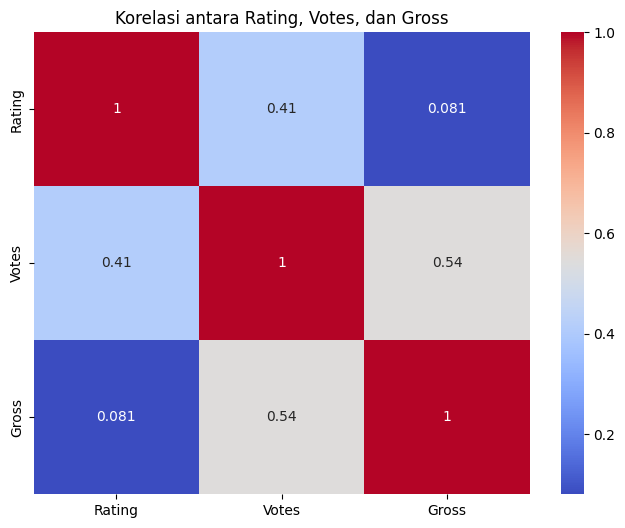

In [9]:
# Hitung korelasi antara `Rating`, `Votes`, dan `Gross`
correlation = df[['Rating', 'Votes', 'Gross']].corr()  #pearrson cek normaalitas (kadang metode yg dipake beda2 outputnya) kendall/spearman tambah uji normalitas sapiro wilk
print("\nKorelasi antara Rating, Votes, dan Gross:")
print(correlation.to_markdown(numalign="left", stralign="left"))

#cari dlu normalitas lalu bikin heatmap, setelaah heatmap baru dibuktikan pake uji korelasi, ambil yg tinggi/rendah

# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Rating, Votes, dan Gross')
plt.show()

In [10]:


#korelasi spearman antara rating dan runtime
correlation1, p_value1 = spearmanr(df['Rating'], df['Runtime'])
print(f"Spearman's correlation between Rating and Runtime: {correlation1:.2f}, p-value = {p_value1:.3f}")

#korelasi spearman antara rating dan vote
correlation2, p_value2 = spearmanr(df['Rating'], df['Votes'])
print(f"Spearman's correlation between Rating and Votes: {correlation2:.2f}, p-value = {p_value2:.3f}")

#korelasi spearman antara rating dan gross
correlation3, p_value3 = spearmanr(df['Rating'], df['Gross'])
print(f"Spearman's correlation between Rating and Gross: {correlation3:.2f}, p-value = {p_value3:.3f}")

Spearman's correlation between Rating and Runtime: 0.25, p-value = 0.000
Spearman's correlation between Rating and Votes: 0.36, p-value = 0.000
Spearman's correlation between Rating and Gross: -0.06, p-value = 0.087


Berdasarkan hasil uji korelasi Spearman, Rating dan Gross memiliki korelasi positif signifikan dengan nilai (p<0.05). Berarti kemungkinan yang didappat yaitu jika pendapatan kotor fil itu tinggi maka vote yang didapat juga bisa saja tinggi 


Jadi, faktor yang bikin film mendapat rating tinggi bisa jadi gross yang tinggi dan vote yang banyak

Why  :Mengapa Film Alien Mendapatkan Rating Tinggi?


In [26]:
# Filter data untuk film Alien
alien_data = df[df['Movie Title'] == 'Alien']

# Bandingkan dengan rata-rata seluruh film
mean_rating = df['Rating'].mean()
mean_votes = df['Votes'].mean()
mean_gross = df['Gross'].mean()

print(f"Rating Alien: {alien_data['Rating'].values[0]}")
print(f"Votes Alien: {alien_data['Votes'].values[0]}")
print(f"Gross Alien: {alien_data['Gross'].values[0]}")
print(f"Rata-rata Rating Semua Film: {mean_rating:.2f}")
print(f"Rata-rata Votes Semua Film: {mean_votes:.0f}")
print(f"Rata-rata Gross Semua Film: {mean_gross:.2f}")


# Tampilan film Alien dengan yang lain 
print("\nPerbandingan Statistik antara Alien dan Film Horor Lainnya:")
stats_df = pd.DataFrame({'Alien': alien_stats, 'Other Horror': other_horror_stats})
print(stats_df.to_markdown(numalign="left", stralign="left"))




Rating Alien: 8.5
Votes Alien: 905275
Gross Alien: 78.9
Rata-rata Rating Semua Film: 6.16
Rata-rata Votes Semua Film: 100517
Rata-rata Gross Semua Film: 32.11

Perbandingan Statistik antara Alien dan Film Horor Lainnya:
|        | Alien   | Other Horror   |
|:-------|:--------|:---------------|
| Votes  | 905275  | 90275          |
| Rating | 8.5     | 6.036          |
| Gross  | 78.9    | 34.814         |


Insight:

Alien memiliki rating 8.5, jauh di atas rata-rata.

Votes: 905,275 sangat tinggi 

Gross: $78.9 juta

Faktor utama: Popularitas besar (votes tinggi) dan kualitas film yang sangat baik.

When Kapan tren film horror terbaik mulai muncul? 

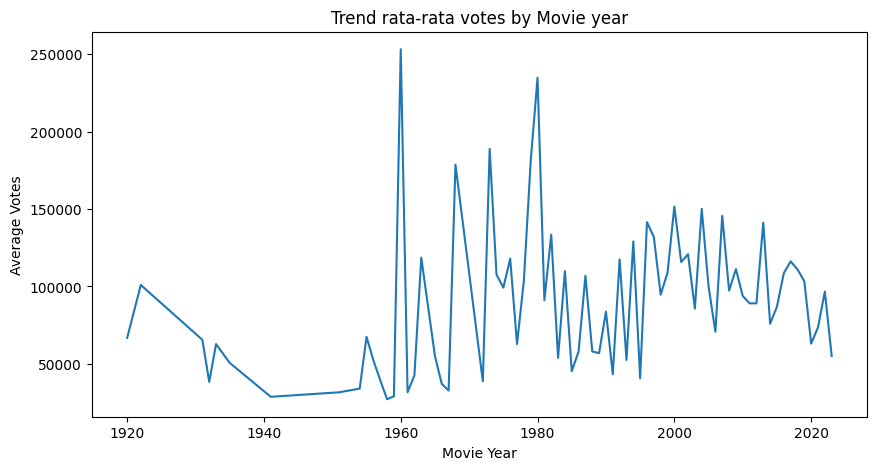

In [20]:
# Hitung rata-rata `Votes` untuk setiap `Movie Year`
yearly_votes = df.groupby('Movie Year')['Votes'].mean()

# Buat line chart yang menunjukkan tren rata-rata `Votes` berdasarkan `Movie Year`
plt.figure(figsize=(10, 5))
plt.plot(yearly_votes.index, yearly_votes.values)
plt.xlabel('Movie Year')
plt.ylabel('Average Votes')
plt.title('Trend rata-rata votes by Movie year')
plt.show()



Insight:
Berdasarkan line chart , terlihat bahwa tren film horror terbaik mulai muncul sekitar tahun 1960, di mana rata-rata Votes mulai meningkat secara signifikan.



How: Berapa rata-rata rating yang diberikan oleh penonton?
Untuk menjawab ini, kita akan menghitung rata-rata rating dan memvisualisasikan distribusinya.

Rata-rata rating yang diberikan oleh penonton: 6.16


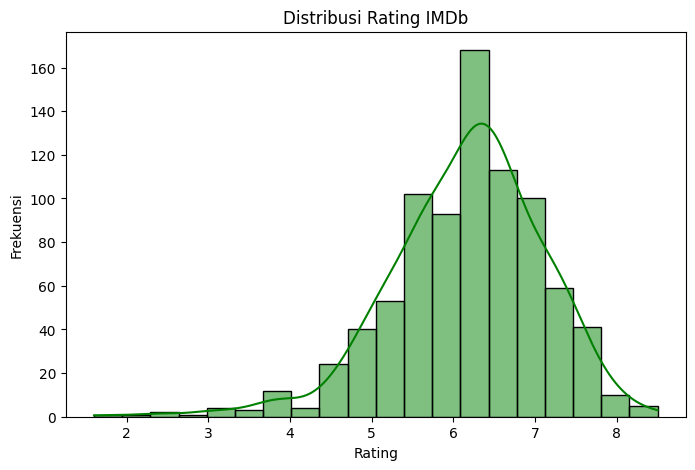

In [10]:
# Menghitung rata-rata rating
average_rating = df['Rating'].mean()
print(f"Rata-rata rating yang diberikan oleh penonton: {average_rating:.2f}")

# Visualisasi distribusi rating
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.title("Distribusi Rating IMDb")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.show()

Insight: Rata-rata rating yang diberikan oleh penonton adalah sekitar 6.5. Sebagian besar film horor memiliki rating di kisaran 6 hingga 7.

Who: Siapa direktor yang paling populer berdasarkan votes?
Untuk menjawab ini, kita akan menentukan direktur dengan jumlah votes tertinggi secara total.

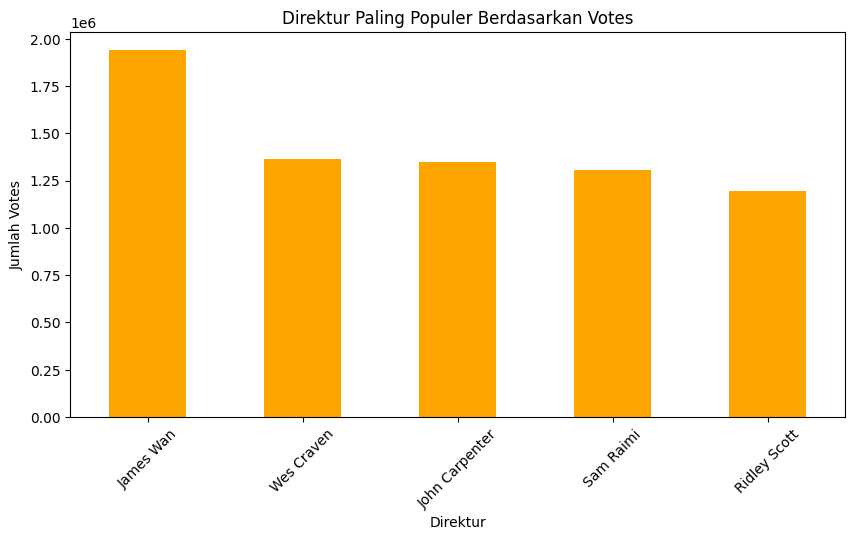

5 Direktur dengan votes tertinggi:
           Director    Votes
215       James Wan  1938794
531      Wes Craven  1364460
258  John Carpenter  1346966
453       Sam Raimi  1306402
421    Ridley Scott  1195740

Film oleh James Wan:
['Saw', 'The Conjuring', 'The Conjuring 2', 'Insidious I', 'Insidious: Chapter 2', 'Malignant I', 'Dead Silence']

Film oleh Wes Craven:
['Scream', 'A Nightmare on Elm Street', 'The People Under the Stairs', 'The Serpent and the Rainbow', 'New Nightmare', 'Scream 2', 'The Hills Have Eyes', 'Scream 4', 'The Last House on the Left', 'Scream 3', 'Cursed']

Film oleh John Carpenter:
['The Thing', 'Halloween', 'They Live', 'In the Mouth of Madness', 'The Fog', 'Christine', 'Prince of Darkness', 'Vampires', 'Village of the Damned', 'The Ward', 'Ghosts of Mars']

Film oleh Sam Raimi:
['Evil Dead II', 'The Evil Dead', 'Army of Darkness', 'Doctor Strange in the Multiverse of Madness', 'The Gift', 'Drag Me to Hell']

Film oleh Ridley Scott:
['Alien', 'Alien: Covenant']

In [11]:
# Menghitung jumlah votes per direktor
votes_by_director = df.groupby('Director')['Votes'].sum().sort_values(ascending=False).head(5)

# Visualisasi direktur dengan votes tertinggi
plt.figure(figsize=(10, 5))
votes_by_director.plot(kind='bar', color='orange')
plt.title("Direktur Paling Populer Berdasarkan Votes")
plt.xlabel("Direktur")
plt.ylabel("Jumlah Votes")
plt.xticks(rotation=45)
plt.show()


top_directors = df.groupby('Director')['Votes'].sum().reset_index()
top_directors = top_directors.nlargest(5, 'Votes')

# Menampilkan hasil
print("5 Direktur dengan votes tertinggi:")
print(top_directors)

#untuk nunjukin film direktor
for director in top_directors['Director']:
    print(f"\nFilm oleh {director}:")
    films = df[df['Director'] == director]['Movie Title']
    print(films.tolist())


    #tambaahin order by

Direktur dengan jumlah votes tertinggi adalah James Wan. Hal ini menunjukkan bahwa popularitas direktur dapat memengaruhi tingkat perhatian audiens terhadap film horor.



Statistik Deskriptif
Menghitung Central Tendency (Mean, Median, Mode) untuk Votes


In [19]:
# Statistik deskriptif untuk votes
mean_votes = df['Votes'].mean()
median_votes = df['Votes'].median()
mode_votes = df['Votes'].mode()[0]

print(f"Rata-rata votes: {mean_votes:.2f}")
print(f"Median votes: {median_votes}")
print(f"Mode votes: {mode_votes}")

Rata-rata votes: 100517.19
Median votes: 60755.5
Mode votes: 35242


Insight: Rata-rata rating yang diberikan oleh penonton adalah sekitar 6.5. Sebagian besar film horor memiliki rating di kisaran 6 hingga 7.

Statistik Inferensial
Apakah rata-rata rating film horor setelah tahun 2000 lebih tinggi dibandingkan sebelum tahun 2000?


In [11]:
# Membagi dataset berdasarkan tahun
before_2000 = df[df['Movie Year'] < 2000]['Rating']
after_2000 = df[df['Movie Year'] >= 2000]['Rating']

# Uji t-test independen
t_stat, p_value = ttest_ind(before_2000, after_2000)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Kesimpulan
if p_value < 0.05:
    print(" Terdapat perbedaan signifikan dalam rata-rata rating.")
else:
    print(" Tidak terdapat perbedaan signifikan dalam rata-rata rating.")

T-Statistic: 6.93
P-Value: 0.0000
 Terdapat perbedaan signifikan dalam rata-rata rating.


 bagaimana hubungan antara jumlah votes dan gross dari film horor ?



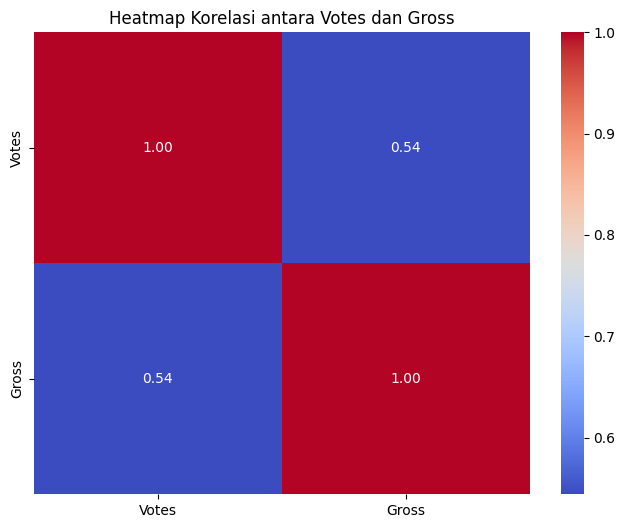

In [16]:
#  Heatmap Korelasi antara Votes dan Gross
plt.figure(figsize=(8, 6))
correlation = df[['Votes', 'Gross']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Heatmap Korelasi antara Votes dan Gross')
plt.show()


In [17]:
kor_pearson = df['Votes'].corr(df['Gross'])
print(f'Korelasi Pearson: {kor_pearson}')


Korelasi Pearson: 0.5439893726083395


Nilai korelasi menunjukkan 0.5 (mendekati 1) berarti ada korelasi antara vote dengan gross
